<a href="https://colab.research.google.com/github/Priyanka-mish/weather_training_data/blob/main/Handwrritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import datetime
import platform

## Load the data
The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [2]:
10000/70000 #14% data is reserved for testing

0.14285714285714285

In [3]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data() #array

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (60000, 28, 28)
x_test (10000, 28, 28)
y_train (60000,)
y_test (10000,)


In [5]:
x_train.ndim

3

### Let us explore the data

In [6]:
pd.DataFrame(x_train[7]) #just one digit

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,253,253,174,6,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,43,...,252,252,252,158,14,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,178,...,252,252,252,252,59,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,109,...,252,252,252,252,59,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,226,252,252,172,7,0,0,0,0,0


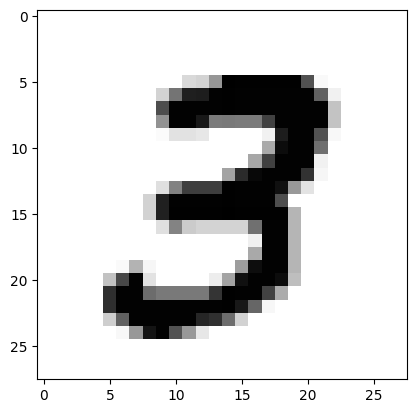

In [7]:
## Plotting the matrix of numbers
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap = plt.cm.binary)
plt.show()


In [8]:
pd.DataFrame(x_train[59999]) #just one digit

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,48,22,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,212,27,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,218,237,248,40,0,21,164,187,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,92,231,122,23,203,236,59,0,0


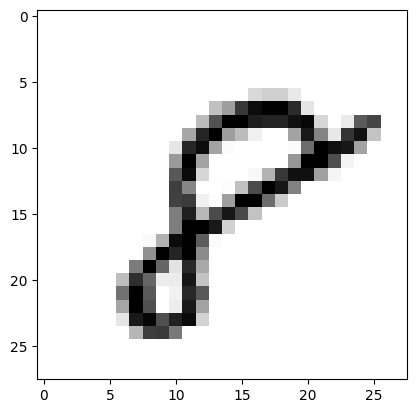

In [9]:
plt.figsize = (6,6)
plt.imshow(x_train[59999], cmap = plt.cm.binary)
plt.show()

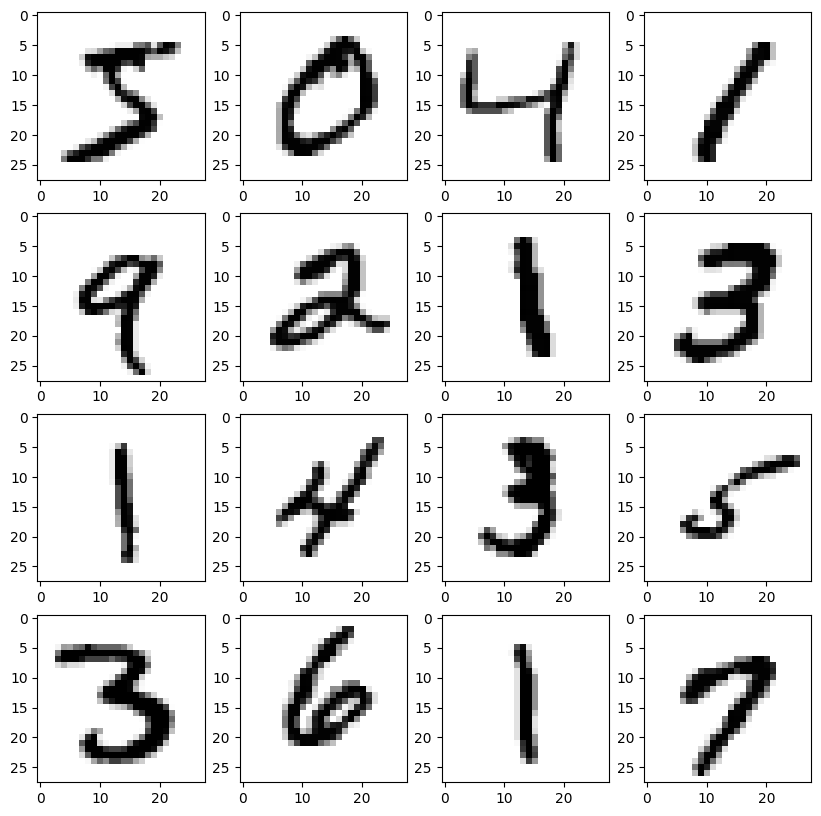

In [10]:
n=16
num_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(10,10))


for i in range(n):
  plt.subplot(num_cells, num_cells, i+1)
  plt.imshow(x_train[i], cmap = plt.cm.binary)

plt.show()

### Let us normalize the data `(move range [0-255] to move [0-1])`

In [11]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

x_train_normalized.min(), x_train_normalized.max()

(0.0, 1.0)

In [12]:
x_test_normalized.min(), x_test_normalized.max()

(0.0, 1.0)

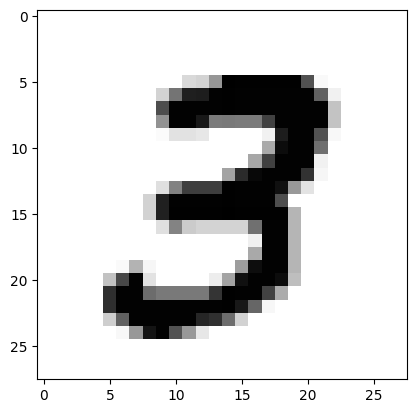

In [13]:
# Before normalistion

plt.figsize = (6,6)
plt.imshow(x_train[7], cmap = plt.cm.binary) #before normalization
plt.show()

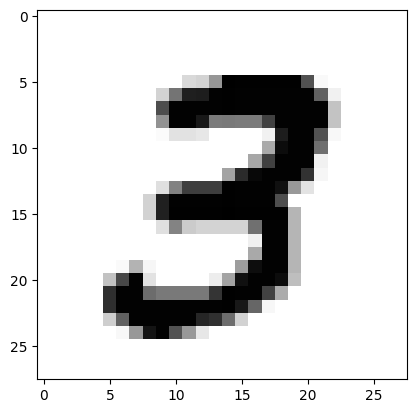

In [15]:
#After normalisation
plt.figsize = (6,6)
plt.imshow(x_train_normalized[7], cmap = plt.cm.binary) #before normalization
plt.show()

# Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. `Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).`


In [16]:
model = tf.keras.models.Sequential() #gives you linear stack of layers - sequential --meaning each layer output is input to the next in the sequence

### Input Layer
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation = tf.keras.activations.relu,
    kernel_regularizer = tf.keras.regularizers.l2(0.002)

))

### Hidden Layer
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
     kernel_regularizer = tf.keras.regularizers.l2(0.002)
))

### Output Layer
model.add(tf.keras.layers.Dense(
    units = 10,
    activation = tf.keras.activations.softmax
))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
print('Number of weights between input features and input neurons', 784*128)
print('Number of weights between input neurons and hidden layer', 128*128)
print('Number of weight between hidden layer and output layer', 128*10)

Number of weights between input features and input neurons 100352
Number of weights between input neurons and hidden layer 16384
Number of weight between hidden layer and output layer 1280


In [19]:
print('Number of total weights across the NN architecture:',100352 +16384+1280)

Number of total weights across the NN architecture: 118016


In [20]:
print('Number of biases between input features and input neurons', 128)
print('Number of biases between input neurons and hidden layer', 128)
print('Number of biases between hidden layer and output layer', 10)

Number of biases between input features and input neurons 128
Number of biases between input neurons and hidden layer 128
Number of biases between hidden layer and output layer 10


In [21]:
print('Number of total biases across the NN architecture:',128+128+10)

Number of total biases across the NN architecture: 266


In [22]:
print('Number of total trainable parameters across the NN architecture:',118016+266)

Number of total trainable parameters across the NN architecture: 118282


**Param #** - column `param #` shows number of parameters (weights & biases) in each layer * which is used for learning during training*


# Compile the model

In [23]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
) #batchsize is standard 32

In [24]:
## Train the modwl

training_hist = model.fit(
    x_train_normalized, y_train, epochs=10, validation_data = (x_test_normalized, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8736 - loss: 0.7795 - val_accuracy: 0.9518 - val_loss: 0.3251
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9524 - loss: 0.3147 - val_accuracy: 0.9439 - val_loss: 0.3105
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9598 - loss: 0.2641 - val_accuracy: 0.9656 - val_loss: 0.2369
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9667 - loss: 0.2333 - val_accuracy: 0.9643 - val_loss: 0.2270
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9649 - loss: 0.2253 - val_accuracy: 0.9687 - val_loss: 0.2055
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9683 - loss: 0.2061 - val_accuracy: 0.9696 - val_loss: 0.2011
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9688 - loss: 0.2024 - val_accuracy: 0.9696 - val_loss: 0.1959
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9706 - loss: 0.19

In [25]:
60000/1875

32.0

**10,000 images -- out of 10K inmages ..it is able to predict the right label for ~9700 images**